# Проект ML

###### Описание проекта:
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Цель проекта — провести анализ и подготовить план действий по удержанию клиентов.
###### Задачи:
- спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
- 1) выделить целевые группы клиентов;
- 2) предложить меры по снижению оттока;
- 3) определить другие особенности взаимодействия с клиентами.

###### Описание данных:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

----



## 1. Импортируем библиотеки. Загрузим данные и подготовим их к анализу.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
gym_churn = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Пропусков нет и нет не обработанных категорианальных признаков что тоже хорошо. Приведем названия столбцов к нижнему регистру и продолжим исследование.

In [6]:
gym_churn.columns = gym_churn.columns.str.lower()

## 2. Проведите исследовательский анализ данных (EDA)

Посмотрим на датасет, изучим средние значения и стандартные отклонения.

In [7]:
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Какие выводи можно сделать из средних значений:

- У нас почти поровну мужчин и женщин, с небольшим преимуществом пола под цифрой 1;
- Большинство клиентов находятся рядом с фитнес-центром;
- Почти половина клиентов - сотрдуники компаний партнеров;
- **31%** клиентов были приведены по акции "Приведи друга"
- Телефон указан в **90%** случаев;
- Средняя длительность абонемента **4,68 месяцев**. Медианное значение - **1 месяц**. То есть больше тех, у кого абонимент на 1 месяц;
- В среднем **41%** клиентов посещает групповые занятия;
- Средний возраст - **29 лет**;
- В среднем фитнес-центр зарабатывает **146.94 уе** с клиента по мимо стоимости абонемента;
- Среднее время до конца абонемента **4,32 месяца**. Однако медиана так же **1 месяц**;
- В среднем наши клиенты с нами около **4 месяцев**, медианное значение - **3 месяца**;
- Средняя частота посещений в неделю за прошлый месяц составляет **1.77 раз**;
- Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, **1.88 раз**;
- Факт оттока, в среднем - **27%**. То есть в прошлом месяце потеряли чуть больше четверти клиентов.


---- 

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [8]:
gym_churn.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:

- Распределение по полу не отличается;
- Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично;
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты;
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
- Наличие мобильного номера клиента не различается и не влияет на отток;
- Средняя длительность договора больше у оставшихся пользователей;
- Оставшиеся пользователи чаще ходят на групповые занятия;
- Средний возраст клиентов больше у оставшихся пользователей;
- Оставшиеся клиенты тратят больше на дополнительные услуги фитнес-центра;
- Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов;
- У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
- Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.


----

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).


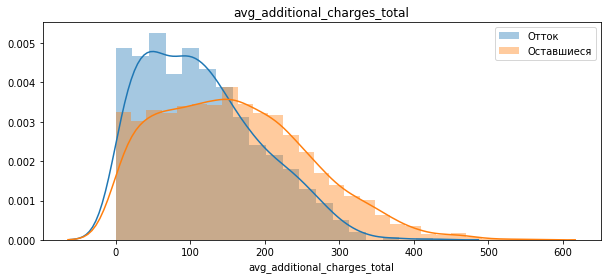

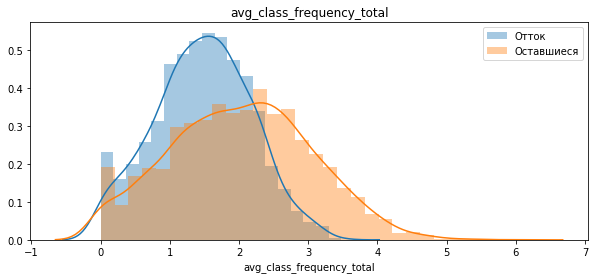

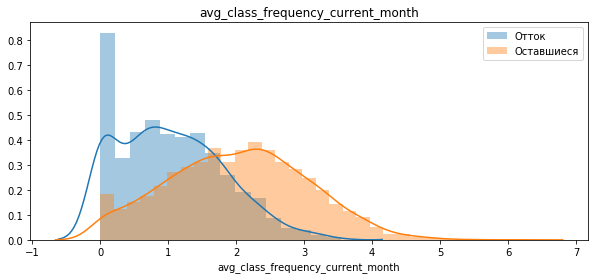

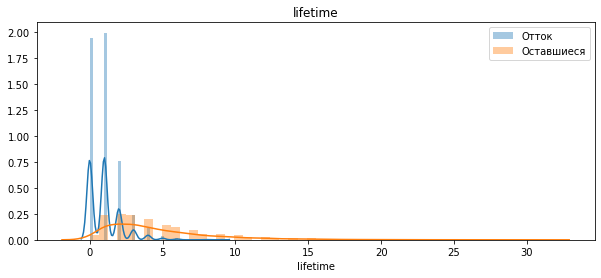

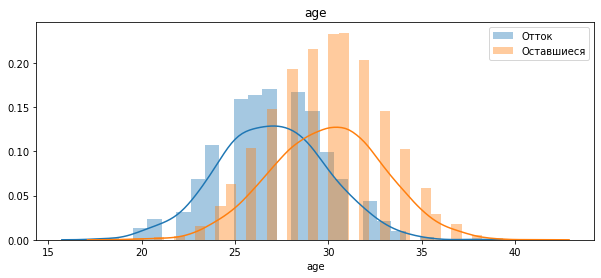

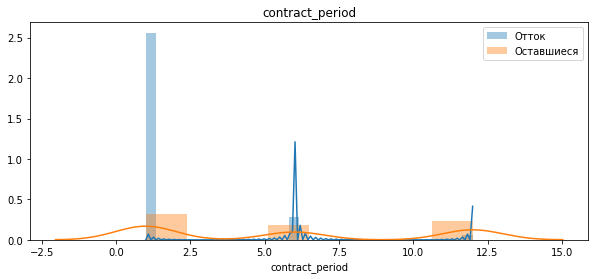

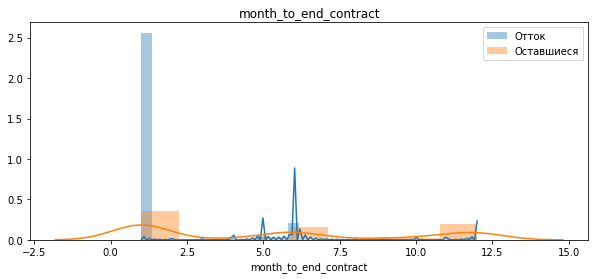

In [9]:
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in distplot_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(gym_churn.query('churn == 1')[column])
    sns.distplot(gym_churn.query('churn == 0')[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

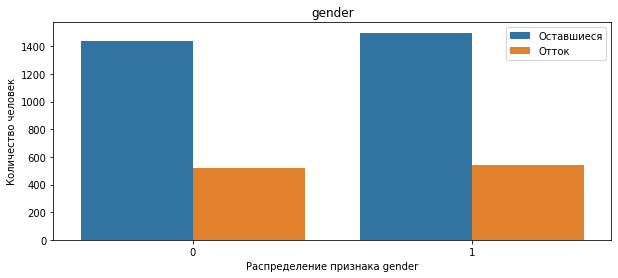

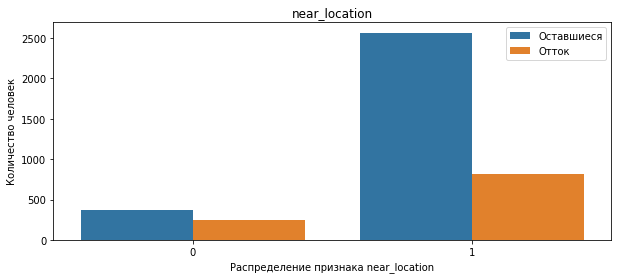

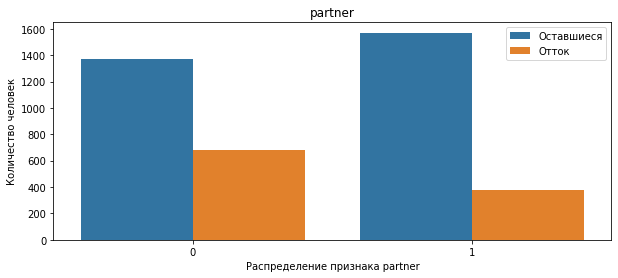

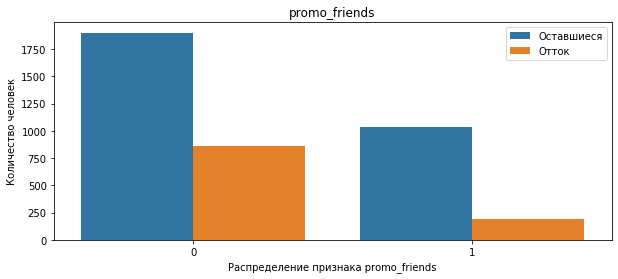

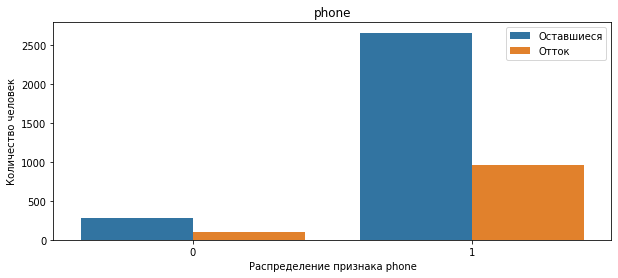

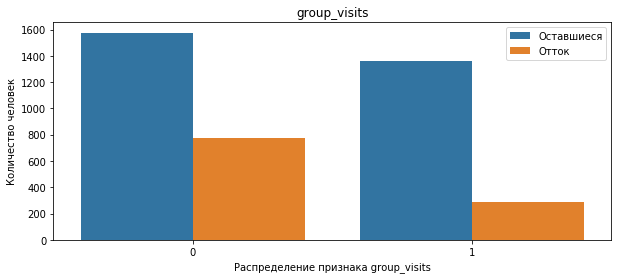

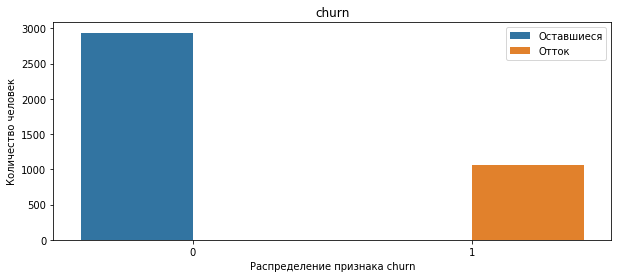

In [10]:
for column in gym_churn.columns:
    if column not in distplot_columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(x = gym_churn[column], hue='churn', data=gym_churn)
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.ylabel('Количество человек')
        plt.xlabel('Распределение признака {}'.format(column))
        plt.show()

###### Вывод:
По всем количественным признакам клиенты, которые остались имеют преимущество. Особенно выделается такой признак как длительность абонемента, с "длинными" абонементами уходят в отток меньше клиентов. Так же, выделяется срок жизни клиента, чем дольше клиент с нами, тем он лояльнее.

---

Построим матрицу корреляций и отобразим её.

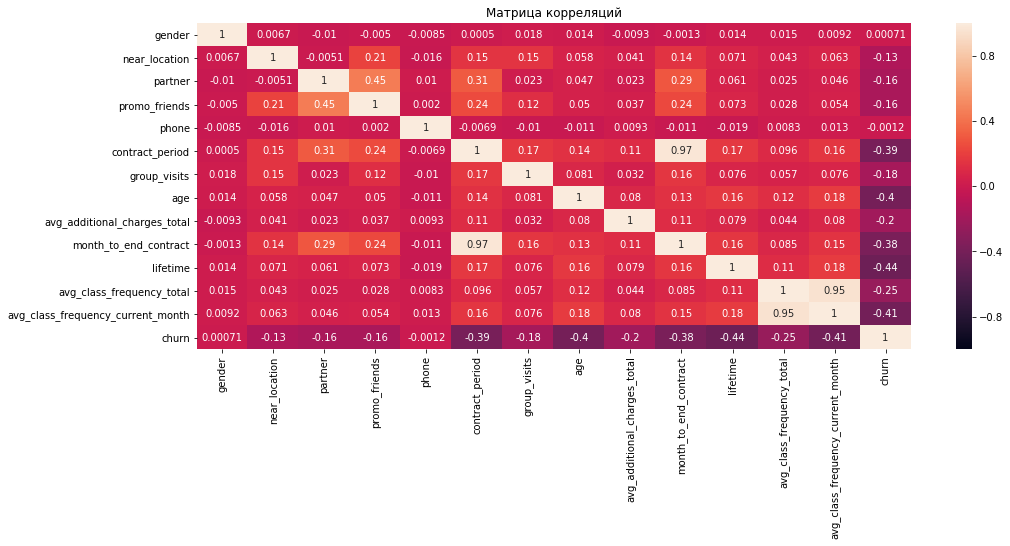

In [11]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(gym_churn.corr(), vmin=-1, vmax=1, annot=True) 
plt.title('Матрица корреляций')
plt.show()

###### Вывод:

Есть сильно коррелирующиеся признаки:
- **'Contract_period'** — длительность текущего действующего абонемента и **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента; 
- **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента и **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;

Оставим по одному из них.

In [12]:
df = gym_churn.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

In [13]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0


## 3. Построим модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

Разобьем данные на обучающую и валидационную выборку функцией train_test_split().

Обучим модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

Оценим метрики Accuracy, Precision и Recall, ROC_AUC для обеих моделей на валидационной выборке. Сравним по ним модели.

Разделим наши данные на признаки (матрица X) и целевую переменную (y). Разделим модель на обучающую и валидационную выборку.


In [13]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Сделаем стандартизацию данных

In [14]:
scaler = StandardScaler() 

X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

Обучим модель логистической регрессией:

In [15]:
model_lr = LogisticRegression(solver='liblinear', random_state = 0)

model_lr.fit(X_train_st, y_train)

probabilities = model_lr.predict_proba(X_test_st)[:, 1]

predictions = model_lr.predict(X_test_st)

print('Модель Логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Модель Логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.82
F1: 0.81
ROC_AUC: 0.96


Обучим модель методом случайного леса.

In [16]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0)

model_rf.fit(X_train_st, y_train)

probabilities = model_rf.predict_proba(X_test_st)[:, 1]

predictions = model_rf.predict(X_test_st)

print('Модель Random forrest')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Модель Random forrest
Accuracy: 0.90
Precision: 0.81
Recall: 0.75
F1: 0.78
ROC_AUC: 0.95


###### Вывод:
- Метрика Accuracy одинакова при обоих методах. Но модель Логистической регрессии показала себя лучше, в ней выше метрика ROC_AUC. Так же для нас важна метрика Recall, так как предупредить отток клиента для нас выгоднее и является ключевым моментом.

---



## 4. Сделайте кластеризацию клиентов


- Стандартизируем данные
- Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендрограмму. Предположим, какое количество кластеров можем выделить.
- Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов.

In [17]:
X_sc = scaler.fit_transform(X)

In [18]:
linked = linkage(X_sc, method = 'ward') 

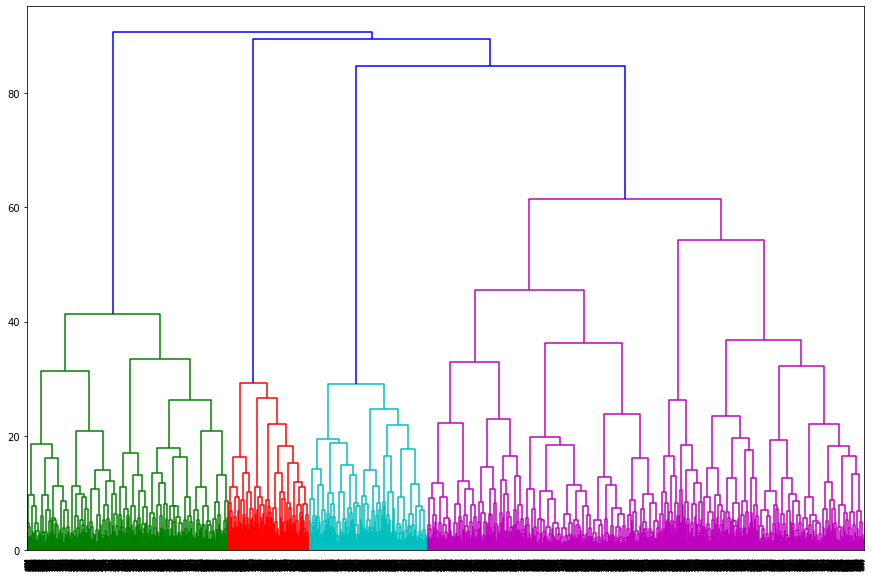

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

###### Вывод:
- Было выделено 4 кластера, но мы в дальнейшем будем брать 5.

In [20]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_sc)

In [21]:
df['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров. Для каждого полученного кластера посчитаем долю оттока.

In [22]:
df.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


In [23]:
df.groupby('cluster_km')['churn'].mean().T

cluster_km
0    0.119797
1    0.403226
2    0.563910
3    0.014896
4    0.266839
Name: churn, dtype: float64

###### Описание кластеров:

**Кластер 0:**
- Отток - **12%**
- Живут или работают недалеко от фитнес-центра
- В основном являются участниками программы парнеров - **99%**
- Так же воспользовались акцией "Приведи друга"
- Обладатели долгосрочных абонементов, в среднем 7 месяцев
- Посещали за прошедший месяц около 2 раз в неделю

**Кластер 1:**
- Отток - **40%**
- Не живут и не работают рядом с фитнес-центром
- В **49%** являются сотрудниками компаний партнеров
- Лишь **8%** пришли по промо акции
- Реже всех посещают групповые занятия - **23%**
- Договора не на длительный срок - в среднем 3 месяца

**Кластер 2:**
- Отток - **56%** - самый высокий
- Живут или работают недалеко от фитнес-центра
- Меньше всего сотрудников компаний-партнеров - **21%**
- Заключают договора в среднем на 2 месяца
- Меньше всех тратят на дополнительные услуги - **119 y.e**
- Реже всего посещали фитнес-центр за последний месяц, в среднем 1.2 раз в неделю

**Кластер 3:**
- Отток - **1%** - самый низкий
- Похожи на кластер 0, но практически никто не воспользовался промо акцией
- **38%** являются сотрудниками компаний партнеров
- Самый возрастной кластер, в среднем **30.7 лет**
- Чаще всех посещают групповые занятия
- Больше остальных тратят на дополниельные услуги - **176 y.e**

**Кластер 4:**
- Отток - **26%**
- В основном живут или работают недалеко от фитнес-центра - **86%**
- Нет мобильного номера
- В среднем договора на 4.7 месяцев
- **30%** пришли по промо акции
- Средних посещений в неделю на предыдущий месяц - 1.7 раз

---


Построим распределения признаков для кластеров.

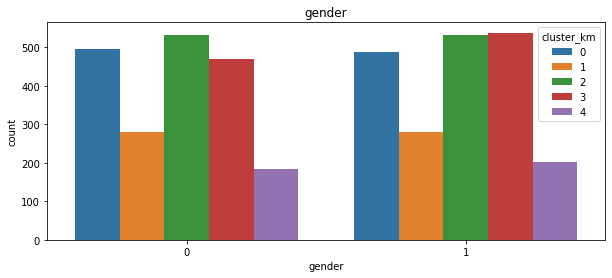

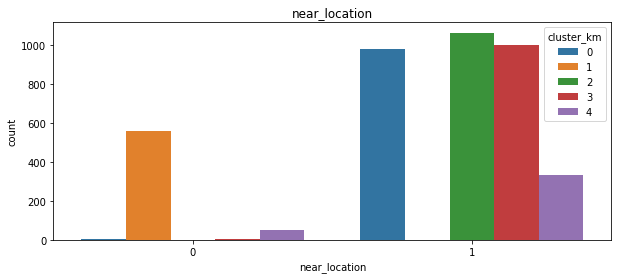

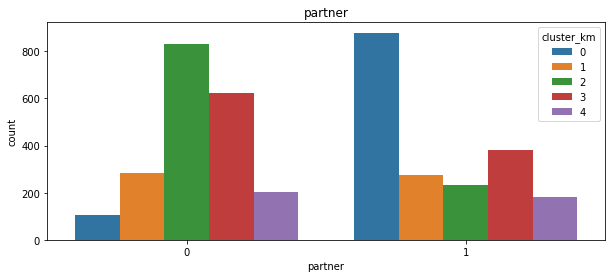

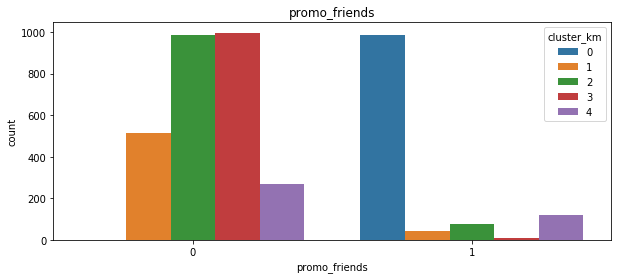

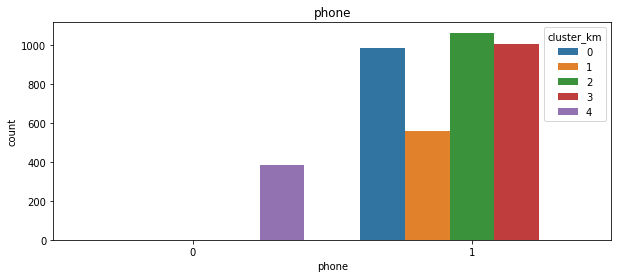

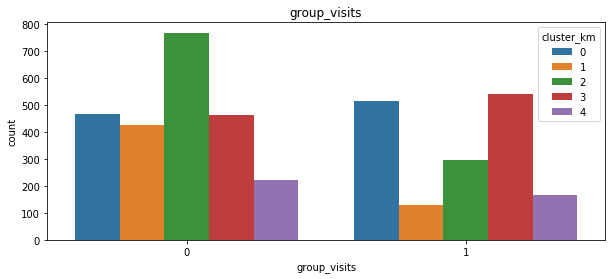

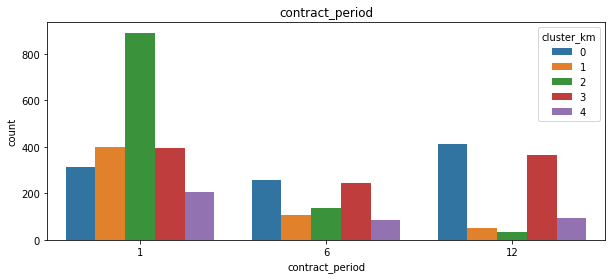

In [24]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']:
    plt.figure(figsize=(10, 4))
    sns.countplot(x = df[column], hue='cluster_km', data=df)
    plt.title(column)
    plt.show()

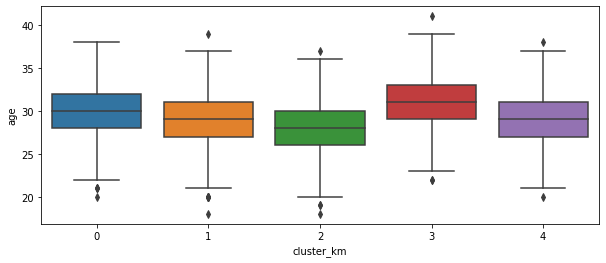

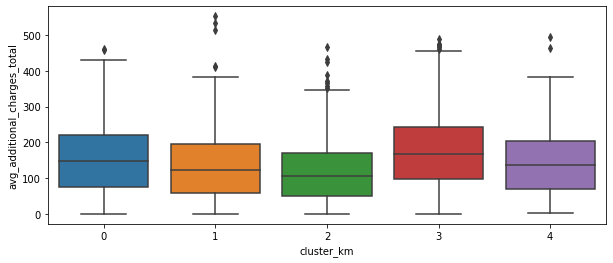

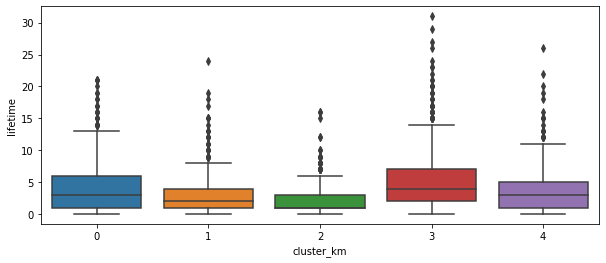

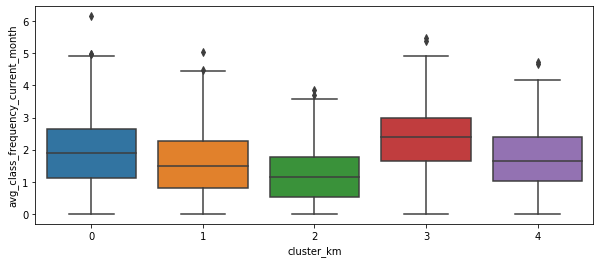

In [25]:
for column in ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x = 'cluster_km', y = df[column], data = df)
    plt.show()


На графиках отчетливо видно как кластер 2 отстает по количественным признакам от остальных. А кластер номер 3 занимает лидирующие позиции. Что подтверждает предыдущие выводы.

---

## 5. Выводы и рекомендации.

###### Выводы по имеющимся данным:

- Распределение по полу примерно одинаково
- Большинство клиентов **85%** живет или работает рядом с фитнес-клубом
- Примерно половина клиентов являются сотрудниками партнерских организаций
- Около **30%** клиентов пришли по программе "Приведи друга"
- Известны мобильные номера примерно **90%** клиентов
- Средняя длительность абонементов клиентов - **4.6 месяцев**
- Около **40%** клиентов посещают групповые занятия
- Средний возраст клиентов **29 лет**
- Средние дополнительные расходы на клиента - **146 y.e**
- Средний срок до окончания договора - **4.3 месяцев**
- Среднее время с момента первого обращения в фитнес-центр - **3.7 месяцев**
- Средняя частота посещений за все время - **1.87 раз в неделю**
- Средняя частота посещений за последний месяц - **1.76 раз в неделю**
- Доля оттока - **27%**

###### Вывод на основе отличий признаков у клиентов, попавших в отток и оставшихся:

- Распределение по полу не отличается;
- Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично;
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты;
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
- Наличие мобильного номера клиента не различается и не влияет на отток;
- Средняя длительность договора больше у оставшихся пользователей;
- Оставшиеся пользователи чаще ходят на групповые занятия;
- Средний возраст клиентов больше у оставшихся пользователей;
- Оставшиеся клиенты тратят больше на дополнительные услуги фитнес-центра;
- Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов;
- У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
- Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.

Мы построили две модели прогнозирования, модель логистической регрессии показала себя лучше, чем модель случайного леса. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту.

Провели разбивку клиентов на 5 групп: 

**Кластер 0:**
- Отток - **12%**
- Живут или работают недалеко от фитнес-центра
- В основном являются участниками программы парнеров - **99%**
- Так же воспользовались акцией "Приведи друга"
- Обладатели долгосрочных абонементов, в среднем 7 месяцев
- Посещали за прошедший месяц около 2 раз в неделю

**Кластер 1:**
- Отток - **40%**
- Не живут и не работают рядом с фитнес-центром
- В **49%** являются сотрудниками компаний партнеров
- Лишь **8%** пришли по промо акции
- Реже всех посещают групповые занятия - **23%**
- Договора не на длительный срок - в среднем 3 месяца

**Кластер 2:**
- Отток - **56%** - самый высокий
- Живут или работают недалеко от фитнес-центра
- Меньше всего сотрудников компаний-партнеров - **21%**
- Заключают договора в среднем на 2 месяца
- Меньше всех тратят на дополнительные услуги - **119 y.e**
- Реже всего посещали фитнес-центр за последний месяц, в среднем 1.2 раз в неделю

**Кластер 3:**
- Отток - **1%** - самый низкий
- Похожи на кластер 0, но практически никто не воспользовался промо акцией
- **38%** являются сотрудниками компаний партнеров
- Самый возрастной кластер, в среднем **30.7 лет**
- Чаще всех посещают групповые занятия
- Больше остальных тратят на дополниельные услуги - **176 y.e**

**Кластер 4:**
- Отток - **26%**
- В основном живут или работают недалеко от фитнес-центра - **86%**
- Нет мобильного номера
- В среднем договора на 4.7 месяцев
- **30%** пришли по промо акции
- Средних посещений в неделю на предыдущий месяц - 1.7 раз

###### Рекомендации:

Из полученных результатов исследования видно, что чем больше клиента связывает с фитнес-центром, тем реже он попадает в отток. Следовательно нужно чаще предлагать клиентам посещать групповые занятие, индивидульные тренировки, пользоваться дополнительными услугами, например, с помощью бесплатных пробных посещений, бонусной программы и мастер классов.
Так же нужно больше внимания уделять тем кто приобретает абонемент на 1 месяц, так как это самые не надежные клиенты. За месяц клиенты не успевают стать к нам лояльными, к тому же редко посещают фитнес-центр. Возможно стоит предоставлять скидку на повторную покупку абонемента тем, кто приобрел его на месяц. Либо ввести новый абонемент, например на 3 месяца, что бы в течении этих 3 месяцев пытаться удержать клиентов.